# Neural Network
-----------------

### ```1.1.0``` Import packages

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score
import numpy as np
import random
import pandas as pd

### ```2.1.0``` Neural Network - (x/y)

In [2]:
# part 1
# helper functions

def triples(count,min_value,max_value):
    numbers = []
    for n in range(count):
        a = random.randint(min_value, max_value)
        b = random.randint(min_value, max_value)
        if(b == 0):
            c = np.inf
        else:
            c = a/b
        numbers.append([a,b,c])
    numbers = np.asarray(numbers)
    return numbers

def diff_relu(matr):
    temp = matr
    temp[temp<=0] = 0
    temp[temp>0] = 1
    return temp

def relu(x):
    return np.maximum(x,0)

def train_network(train_x,train_y,in_size,l_size,out_size,epochs=500000,learn_rate=0.000001,verbose=False):
    
    iteration=0
    
    L1 = np.random.rand(l_size, in_size)
    L2 = np.random.rand(l_size, l_size)
    L3 = np.random.rand(out_size, l_size )
    
    
    while(iteration < epochs):
        o0 = train_x.T
        Z1 = np.matmul(L1,o0)
        
        o1 = relu(Z1)
        Z2 = np.matmul(L2,o1)
        
        o2 = relu(Z2)
        Z3 = np.matmul(L3,o2)
        
        o3 = Z3
        layer_loss3 = o3 - train_y.T
        
        diff = diff_relu(Z3)
        loss = np.multiply(layer_loss3,diff)                    
        layer_loss2 = np.matmul(L3.T, loss)
        
        dw2 = np.matmul( loss, o2.T ) 
        diff = diff_relu(Z2)
        loss = np.multiply(layer_loss2,diff)                     
        layer_loss1 = np.matmul(L2.T, loss)
        
        dw1 = np.matmul( loss, o1.T ) 
        diff = diff_relu(Z1)
        loss = np.multiply(layer_loss3,diff)     
        dw0 = np.matmul( loss, o0.T )
        
        L1 -= learn_rate * dw0
        L2 -= learn_rate * dw1
        L3 -= learn_rate * dw2
        
        iteration+=1
        if(iteration%10000 == 0 and verbose):
            print('({0}/{1})'.format(iteration,epochs))
    
    return L1,L2,L3

def predict_network(test_x,L1,L2,L3):
    Z0 = test_x.T
    o0 = Z0
    Z1 = np.matmul(L1,o0)
    o1 = relu(Z1)
    Z2 = np.matmul(L2,o1)
    o2 = relu(Z2)
    Z3 = np.matmul(L3,o2)
    o3 = relu(Z3)
    return o3[0]

def split_dataset(x_raw,test_frac=0.3):
    train, test = train_test_split(x_raw, test_size=test_frac)
    train_x = train[:,:2]
    train_y = train[:,2]
    test_x = test[:,:2]
    test_y = test[:,2]
    return train_x,train_y,test_x,test_y

### ```2.2.0``` Generate Training Data and split datasets

In [3]:
# generate training data
x_raw = triples(1000,1,10)
train_x,train_y,test_x,test_y = split_dataset(x_raw,0.2)

In [4]:
print(x_raw)

[[ 4.          8.          0.5       ]
 [ 1.          9.          0.11111111]
 [ 9.          4.          2.25      ]
 ...
 [ 9.          4.          2.25      ]
 [ 5.          3.          1.66666667]
 [10.          4.          2.5       ]]


### ```2.3.0``` Model Training

In [5]:
# train network
L1,L2,L3 = train_network(train_x,train_y,in_size=2,l_size=5,out_size=1,epochs=50000,learn_rate=0.0000005,verbose=True)

(10000/50000)
(20000/50000)
(30000/50000)
(40000/50000)
(50000/50000)


### ```2.4.0``` Predict f(x,y) = x/y

In [6]:
# make prediction
predict_y = predict_network(test_x,L1,L2,L3)

In [7]:
# create dataframe
df = pd.DataFrame(data=test_x,columns=['X1','X2'])
df['Y_ACTUAL'] = test_y
df['Y_PREDICTED'] = predict_y
df.head(n=10)

,X1,X2,Y_ACTUAL,Y_PREDICTED
0,6.0,10.0,0.600000,0.794374
1,1.0,6.0,0.166667,0.099650
2,3.0,7.0,0.428571,0.382073
3,2.0,6.0,0.333333,0.244640
4,10.0,8.0,1.250000,1.389448
5,4.0,3.0,1.333333,0.557291
6,8.0,6.0,1.333333,1.114581
7,5.0,10.0,0.500000,0.649384
8,5.0,2.0,2.500000,1.659592
9,9.0,2.0,4.500000,5.759160


### ```2.4.1``` Visualize Predictions

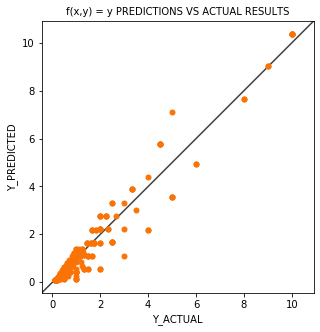

In [8]:
# the closer to the line y=x the points are the better is our model

fig, ax = plt.subplots(figsize=(10,5))
ax.scatter(df['Y_ACTUAL'], df['Y_PREDICTED'], s=25, c='xkcd:orange', cmap=plt.cm.YlGn, zorder=10)

lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
]

# now plot both limits against eachother
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
ax.set_title(label='f(x,y) = y PREDICTIONS VS ACTUAL RESULTS',fontsize=10)
ax.set_xlabel('Y_ACTUAL')
ax.set_ylabel('Y_PREDICTED')
ax.set_aspect('equal')
ax.set_xlim(lims)
ax.set_ylim(lims)
plt.show()

### ```2.5.0``` Model Performance and R2 score

In [9]:
# r2 measure of accuracy score
r2 = r2_score(test_y, predict_y)
df_r2 = pd.DataFrame([[r2]],columns=['MY R2 SCORE'])
df_r2.head()

,MY R2 SCORE
0,0.930968


### ```3.1.0``` MNIST handwritten digit classification using Tensorflow

In [10]:
# part 2 - mnist dataset
mnist  = tf.keras.datasets.mnist
(x_train,y_train), (x_test,y_test) = mnist.load_data()

In [11]:
# helper fucntions
def show_sample(sample,cmap=plt.cm.binary):
    plt.imshow(sample,cmap)
    plt.show()
    
def construct_network():
    # adding neural network layers
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(128,activation=tf.nn.relu))
    model.add(tf.keras.layers.Dense(128,activation=tf.nn.relu))
    model.add(tf.keras.layers.Dense(10,activation=tf.nn.softmax))
    model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
    return model

def train_mnist(model,x_train,y_train,ep):
    model.fit(x_train,y_train,epochs=ep)
    model.save('models/mnist_ff')
    
def show_predictions(predictions,x_test,num,rows):
    
    cols = int(num/rows)

    i_list = []
    imno = 0
    for x in range(num):
        i = random.randint(1,predictions.shape[0])
        i_list.append(i)
    
    
    f, ax = plt.subplots(rows,cols,figsize=(20, 10))
    for r in range(rows):
        for c in range(cols):
            if(rows > 1):
                ax[r,c].imshow(x_test[i_list[imno]],cmap=plt.cm.YlGn)
                ax[r,c].text(3, 3, np.argmax(predictions[i_list[imno]]), bbox={'facecolor': 'white', 'pad': 10})
            else:
                ax[c].imshow(x_test[i_list[imno]],cmap=plt.cm.YlGn)
                ax[c].text(3, 3, np.argmax(predictions[i_list[imno]]), bbox={'facecolor': 'white', 'pad': 10})
            imno+=1
    plt.show()
    
    

In [12]:
# normalizing dataset
x_train = tf.keras.utils.normalize(x_train,axis=1)
x_test = tf.keras.utils.normalize(x_test,axis=1)

In [13]:
# build network and train model
model = construct_network()
model = train_mnist(model,x_train,y_train,3)

Train on 60000 samples
Epoch 1/3
60000/60000 [==============================] - 4s 66us/sample - loss: 0.2572 - accuracy: 0.9239
Epoch 2/3
60000/60000 [==============================] - 4s 65us/sample - loss: 0.1043 - accuracy: 0.9683
Epoch 3/3
60000/60000 [==============================] - 4s 64us/sample - loss: 0.0721 - accuracy: 0.9776
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: models/mnist_ff/assets


In [14]:
#make prediction
model = tf.keras.models.load_model('models/mnist_ff')
predictions = model.predict(x_test)

### ```3.2.0``` Display N random predictions 

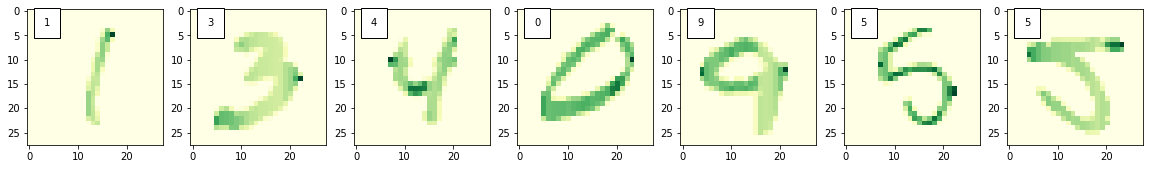

In [15]:
show_predictions(predictions,x_test,7,1)

### ```3.3.0``` Model Performance

In [16]:
#model accuracy
loss, accuracy = model.evaluate(x_test,y_test)
print(loss,accuracy)

10000/10000 [==============================] - 0s 47us/sample - loss: 0.0925 - accuracy: 0.9707
0.0925070320494473 0.9707
